<a href="https://colab.research.google.com/github/anajikadam17/MachineCodeBasics/blob/main/Outlier_Detection_and_Remove(Percentile%2CSTD_z_Score%2C_IQR).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#checking the number of rows for each variable that fall outside 3*IQR range
def get_outliers_count(dataframe):
    count = {}
    for col in dataframe.columns:
        sorted_col = sorted(dataframe[col])
        Q1,Q3 = np.percentile(sorted_col , [25,75])
        IQR = Q3 - Q1
        lower_range = Q1 - (3 * IQR)
        upper_range = Q3 + (3 * IQR)    
        outliers_df = dataframe[(dataframe[col] > upper_range) | (dataframe[col] < lower_range)]
        count[col] = outliers_df[col].count()
    return count

In [ ]:
#removes outliers which are not in 3*IQR range
def remove_outliers(dataframe, column):
    sorted_col = sorted(dataframe[column])
    Q1,Q3 = np.percentile(sorted_col , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (3 * IQR)  # 1.5 * IQR
    upper_range = Q3 + (3 * IQR)  
    print(lower_range)
    print(upper_range)
    dataframe_out = dataframe[(dataframe[column] > lower_range) & (dataframe[column] < upper_range)]
    return dataframe_out

In [ ]:
from scipy.stats.mstats import winsorize
def treat_outliers(dataframe, col_list):
    for col in col_list:
        dataframe[col] = winsorize(dataframe[col], limits=[0.05, 0.05], inclusive=(True, True))
    return dataframe

In [ ]:
import pandas as pd
path = 'https://raw.githubusercontent.com/codebasics/py/master/ML/FeatureEngineering/1_outliers/'

In [ ]:
df = pd.read_csv(path+"heights.csv")
df.head()

,name,height
0,mohan,5.9
1,maria,5.2
2,sakib,5.1
3,tao,5.5
4,virat,4.9


In [ ]:
# Detect outliers using percentile
max_thresold = df['height'].quantile(0.95)
max_thresold


9.689999999999998

In [ ]:
df[df['height']>max_thresold]

,name,height
9,imran,14.5


In [ ]:
min_thresold = df['height'].quantile(0.05)
min_thresold

3.6050000000000004

In [ ]:
df[df['height']<min_thresold]

,name,height
12,yoseph,1.2


In [ ]:
df[(df['height']>max_thresold)|(df['height']<min_thresold)]
# df[(df['height']<max_thresold) & (df['height']>min_thresold)]

,name,height
9,imran,14.5
12,yoseph,1.2


In [ ]:
df[(df['height']<max_thresold) & (df['height']>min_thresold)]

,name,height
0,mohan,5.9
1,maria,5.2
2,sakib,5.1
3,tao,5.5
4,virat,4.9
5,khusbu,5.4
6,dmitry,6.2
7,selena,6.5
8,john,7.1
10,jose,6.1


In [ ]:
# Now lets explore banglore property prices dataset

df = pd.read_csv(path+"bhp.csv")
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [ ]:
df.shape

(13200, 7)

In [ ]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [ ]:
# Explore samples that are above 99.90% percentile and below 1% percentile rank

min_thresold, max_thresold = df['price_per_sqft'].quantile([0.001, 0.999])
min_thresold, max_thresold

(1366.184, 50959.36200000099)

In [ ]:
df[(df['price_per_sqft'] < min_thresold) | (df['price_per_sqft'] > max_thresold)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
665,Yelahanka,3 BHK,35000.0,3.0,130.0,3,371
798,other,4 Bedroom,10961.0,4.0,80.0,4,729
1005,other,1 BHK,15.0,1.0,30.0,1,200000
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
1867,other,3 Bedroom,52272.0,2.0,140.0,3,267
2392,other,4 Bedroom,2000.0,3.0,25.0,4,1250
3934,other,1 BHK,1500.0,1.0,19.5,1,1300
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
4924,other,7 BHK,5.0,7.0,115.0,7,2300000


In [ ]:
# Remove outliers
df2 = df[(df.price_per_sqft<max_thresold) & (df.price_per_sqft>min_thresold)]
df2.shape

(13172, 7)

In [ ]:

df2.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13172.000000,13172.000000,13172.000000,13172.000000,13172.000000
mean,1537.861049,2.690100,111.591865,2.799651,6663.653735
std,967.123711,1.337026,145.372047,1.291130,4141.020700
min,250.000000,1.000000,8.000000,1.000000,1379.000000
25%,1100.000000,2.000000,50.000000,2.000000,4271.000000
50%,1274.500000,2.000000,71.550000,3.000000,5438.000000
75%,1670.000000,3.000000,120.000000,3.000000,7311.000000
max,30400.000000,40.000000,3600.000000,43.000000,50349.000000


In [ ]:
# Excercise
path = "https://raw.githubusercontent.com/codebasics/py/master/ML/FeatureEngineering/1_outliers/Exercise/AB_NYC_2019.csv"
df = pd.read_csv(path)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
df['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [ ]:
min_thresold, max_thresold = df['price'].quantile([0.01,0.999])
min_thresold, max_thresold

(30.0, 3000.0)

In [ ]:
df2 = df[(df['price'] > min_thresold) & (df['price'] < max_thresold)]
df2.shape

(48183, 16)

In [ ]:
df2.sample(5)['price']

17085    150
47724    275
28814     35
14926     69
40851    100
Name: price, dtype: int64

In [ ]:
df.shape[0] - df2.shape[0] # nimber of outliers

712

In [ ]:
# Outlier detection and removal: z score, standard deviation | Feature engineering

In [ ]:
path  = 'https://raw.githubusercontent.com/codebasics/py/master/ML/FeatureEngineering/2_outliers_z_score/heights.csv'

df = pd.read_csv(path)
df.head()

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [ ]:
df.shape

(10000, 2)

In [ ]:
df.describe()

,height
count,10000.000000
mean,66.367560
std,3.847528
min,54.263133
25%,63.505620
50%,66.318070
75%,69.174262
max,78.998742


In [ ]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,6)

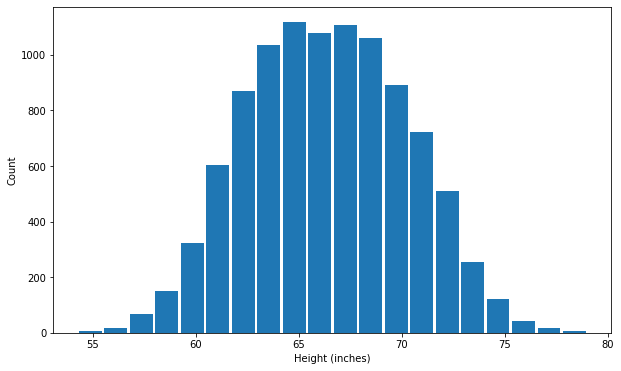

In [ ]:
height = df['height']

plt.hist(height, bins=20, rwidth=0.9)
plt.xlabel('Height (inches)')
plt.ylabel('Count')
plt.show()

In [ ]:
height.min(), height.max()

(54.26313333, 78.99874235)

In [ ]:
from scipy.stats import norm
import numpy as np



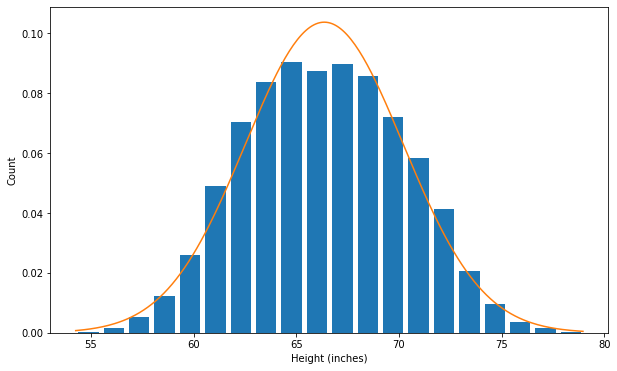

In [ ]:
plt.hist(df.height, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(df.height.min(), df.height.max(), 0.1)
plt.plot(rng, norm.pdf(rng,df.height.mean(),df.height.std()))
plt.show()

In [ ]:

print(df.height.mean())
print(df.height.std()  ) # How far away datapoint from mean value

66.3675597548656
3.847528120795573


### (1) Outlier detection and removal using 3 standard deviation
One of the ways we can remove outliers is remove any data points that are beyond 3 standard deviation from mean. Which means we can come up with following upper and lower bounds

In [ ]:
upper_limit = df.height.mean() + 3*df.height.std()
lower_limit = df.height.mean() -3*df.height.std()
print(upper_limit)
print(lower_limit)

77.91014411725232
54.824975392478876


In [ ]:
# Here are the outliers that are beyond 3 std dev from mean

df[(df.height>upper_limit) | (df.height<lower_limit)]

,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [ ]:
# Now remove these outliers and generate new dataframe

df_no_outlier_std_dev = df[(df.height<upper_limit) & (df.height>lower_limit)]
df_no_outlier_std_dev.head()

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [ ]:
df_no_outlier_std_dev.shape

(9993, 2)

In [ ]:
df_no_outlier_std_dev.height.describe()

count    9993.000000
mean       66.363856
std         3.835511
min        54.873728
25%        63.505894
50%        66.317755
75%        69.169353
max        77.547186
Name: height, dtype: float64

In [ ]:
df.shape[0]- df_no_outlier_std_dev.shape[0]  # no of outlier

7

### (2) Outlier detection and removal using Z Score
Z score is a way to achieve same thing that we did above in part (1)

Z score indicates how many standard deviation away a data point is.

For example in our case mean is 66.37 and standard deviation is 3.84.

If a value of a data point is 77.91 then Z score for that is 3 because it is 3 standard deviation away (77.91 = 66.37 + 3 * 3.84)

In [ ]:
df['zscore'] = ( df.height - df.height.mean() ) / df.height.std()
df.head(5)

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [ ]:
# Get data points that has z score higher than 3 or lower than -3. 
# Another way of saying same thing is get data points that are more than 3 standard deviation away

df[df['zscore']>3]

,gender,height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854


In [ ]:
# Remove the outliers and produce new dataframe
df_no_outliers = df[(df.zscore>-3) & (df.zscore<3)]
df_no_outliers.head()

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [ ]:
df.shape[0]- df_no_outliers.shape[0]  # no of outlier

7

## Exercise

###  Exercise: Outlier removal using standard deviation and z score

In [ ]:
path = 'https://raw.githubusercontent.com/codebasics/py/master/ML/FeatureEngineering/2_outliers_z_score/Exercise/bhp.csv'

df = pd.read_csv(path)
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [ ]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [ ]:
df['price_per_sqft'].describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [ ]:
df.shape

(13200, 7)

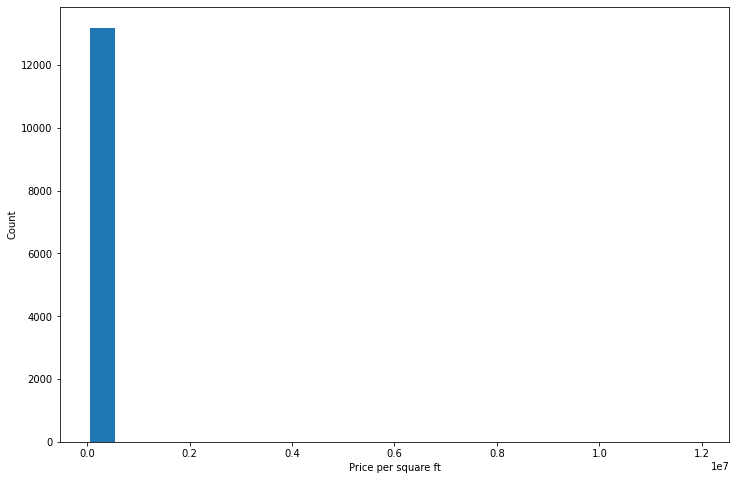

In [ ]:
plt.hist(df.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()


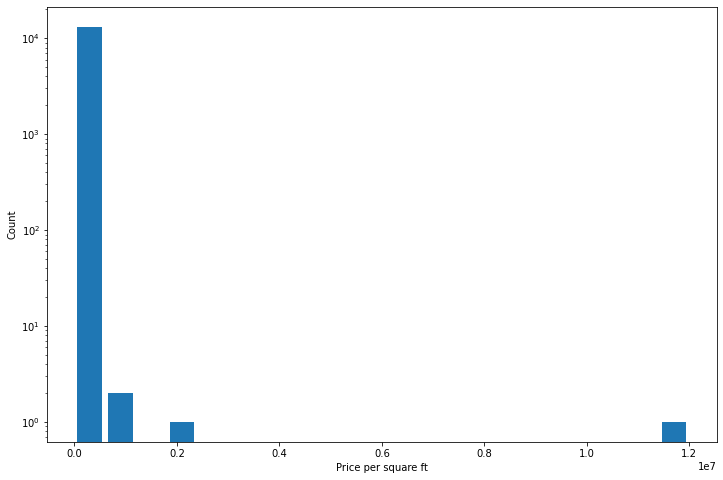

In [ ]:
plt.hist(df.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.yscale('log')   # scale log
plt.show()

In [ ]:
# (1) Treat outliers using percentile first
lower_limit, upper_limit = df.price_per_sqft.quantile([0.001, 0.999])
lower_limit, upper_limit

(1366.184, 50959.36200000099)

In [ ]:
outliers = df[(df.price_per_sqft>upper_limit) | (df.price_per_sqft<lower_limit)]   # outlier
outliers.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9144,other,4 Bedroom,10961.0,4.0,80.0,4,729
2392,other,4 Bedroom,2000.0,3.0,25.0,4,1250
5343,other,9 BHK,42000.0,8.0,175.0,9,416
1867,other,3 Bedroom,52272.0,2.0,140.0,3,267
12355,other,4 BHK,16335.0,4.0,149.0,4,912
7862,JP Nagar,3 BHK,20000.0,3.0,175.0,3,875
11447,Whitefield,4 Bedroom,60.0,4.0,218.0,4,363333
6356,Bommenahalli,4 Bedroom,2940.0,3.0,2250.0,4,76530
11635,Begur,3 BHK,2400.0,3.0,12.0,3,500
5911,Mysore Road,1 Bedroom,45.0,1.0,23.0,1,51111


In [ ]:
df2 = df[(df.price_per_sqft<upper_limit) & (df.price_per_sqft>lower_limit)]  # removed outlier
df2.shape

(13172, 7)

In [ ]:
df.shape[0] - df2.shape[0]


28

In [ ]:
# (2) Now remove outliers using 4 standard deviation

max_limit = df2.price_per_sqft.mean() + 4*df2.price_per_sqft.std()
min_limit = df2.price_per_sqft.mean() - 4*df2.price_per_sqft.std()
max_limit, min_limit

(23227.73653589429, -9900.429065502549)

In [ ]:

df3 = df2[(df2.price_per_sqft>min_limit) & (df2.price_per_sqft<max_limit)]
df3.shape

(13047, 7)

In [ ]:
df2.shape[0]-df3.shape[0]
# In this step we removed total 125 outliers



125

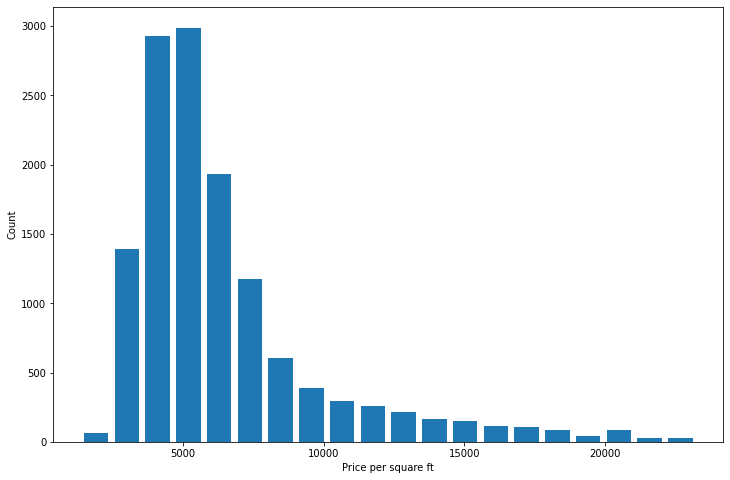

In [ ]:

plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

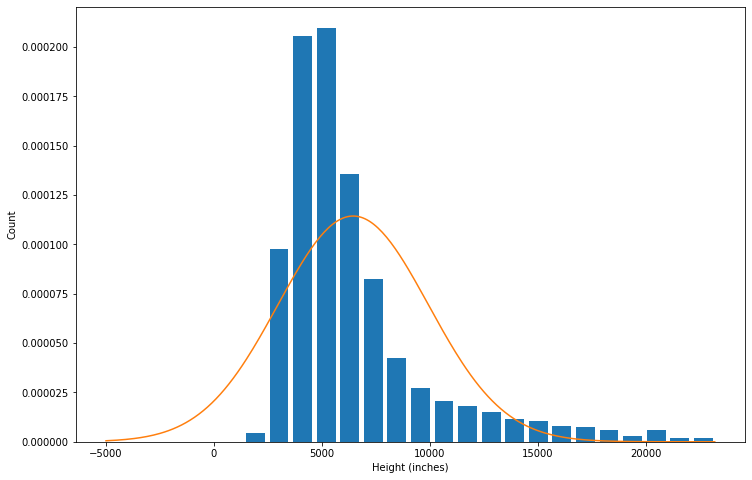

In [ ]:
from scipy.stats import norm
import numpy as np

plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(-5000, df3.price_per_sqft.max(), 100)
plt.plot(rng, norm.pdf(rng,df3.price_per_sqft.mean(),df3.price_per_sqft.std()))


In [ ]:
# (3) Now remove outliers using z score. Use z score of 4 as your thresold

df2['zscore'] = ((df2.price_per_sqft- df2.price_per_sqft.mean())/(df2.price_per_sqft.std()))
df2.sample(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
2140,other,2 BHK,1095.0,2.0,40.00,2,3652,-0.727273
11459,Old Madras Road,3 BHK,1530.0,3.0,76.34,3,4989,-0.404406
8182,Hegde Nagar,2 BHK,1340.0,2.0,72.00,2,5373,-0.311675
3676,Kambipura,2 BHK,883.0,2.0,39.00,2,4416,-0.542778
10483,Bannerghatta Road,2 BHK,1115.0,2.0,61.00,2,5470,-0.288251
12001,Iblur Village,4 BHK,3633.0,5.0,335.00,4,9221,0.617564
5319,8th Phase JP Nagar,1 BHK,500.0,1.0,31.00,1,6200,-0.111966
12940,Harlur,2 BHK,1335.0,2.0,72.76,2,5450,-0.293081
3372,Lingadheeranahalli,3 BHK,1530.0,2.0,90.00,3,5882,-0.188759
7382,Margondanahalli,2 Bedroom,1140.0,2.0,60.00,2,5263,-0.338239


In [ ]:
outliers_z = df2[(df2.zscore < -4) | (df2.zscore>4)]
outliers_z.shape

(125, 8)

In [ ]:

df4 = df2[(df2.zscore>-4)&(df2.zscore<4)]
df4.shape

(13047, 8)

In [ ]:
# In this step also we removed 125 outliers. The result would be exactly same as 4 standard deviation
df2.shape[0] - df4.shape[0]

125

## 3_outlier_IQR

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.github.com/codebasics/py/master/ML/FeatureEngineering/3_outlier_IQR/heights.csv")
df.head()

,name,height
0,mohan,1.2
1,maria,2.3
2,sakib,4.9
3,tao,5.1
4,virat,5.2


In [ ]:
# Detect outliers using IQR
Q1 = df.height.quantile(0.25)
Q3 = df.height.quantile(0.75)
Q1, Q3

(5.3500000000000005, 6.275)

In [ ]:
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(3.962500000000001, 7.6625)

In [ ]:
# Here are the outliers
df[(df.height<lower_limit)|(df.height>upper_limit)]

,name,height
0,mohan,1.2
1,maria,2.3
17,aamir,14.5
18,ken,23.2
19,Liu,40.2


In [ ]:
# Remove outliers
df_no_outlier = df[(df.height>lower_limit)&(df.height<upper_limit)]
df_no_outlier

,name,height
2,sakib,4.9
3,tao,5.1
4,virat,5.2
5,khusbu,5.4
6,dmitry,5.5
7,selena,5.5
8,john,5.6
9,imran,5.6
10,jose,5.8
11,deepika,5.9
